# Entregável 1 - visão computacional

In [146]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print "OpenCV Version : %s " % cv2.__version__

OpenCV Version : 2.4.11 


# Equalização de histograma

In [147]:
rintin = cv2.imread("RinTinTin.jpg")

In [148]:
rintin.shape

(240, 320, 3)

In [149]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [150]:
rintin_gray.shape

(240, 320)

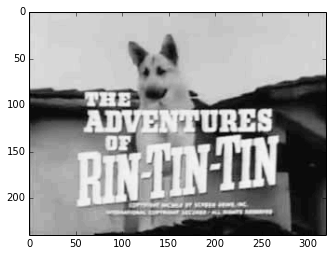

In [151]:
plt.imshow(rintin_gray, cmap="Greys_r")

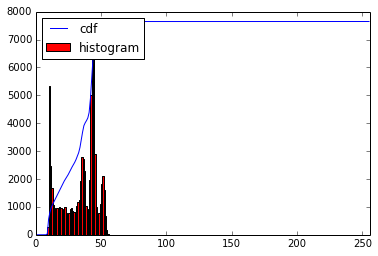

In [152]:

hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?
2. Equalize o histograma de maneira que a cumulativa seja uma função linear na diagonal do gráfico
3. Plote a imagem desenhada

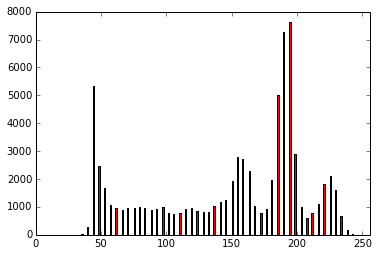

In [153]:
m_gray = max(rintin_gray.flatten())
m_value = max(bins) / m_gray
new_hist = [i * m_value for i in rintin_gray.flatten()]

plt.hist(new_hist, 256, [0,256], color = 'r')
plt.xlim([0,256])
plt.show()

Exemplo de como queremos que o histograma fique

In [154]:
rintin_gray

array([[21, 39, 42, ..., 41, 41, 37],
       [22, 40, 44, ..., 42, 42, 37],
       [23, 41, 45, ..., 42, 43, 38],
       ..., 
       [14, 28, 35, ..., 18, 18, 17],
       [16, 29, 36, ..., 18, 17, 17],
       [18, 31, 38, ..., 18, 17, 17]], dtype=uint8)

Devemos multiplicar estes valores pelo m_value (valor do máximo do x do histograma com o máximo encontrado)

In [155]:
rintin_gray_new = [line * m_value for line in rintin_gray]
rintin_gray_new

[array([  92.68965517,  172.13793103,  185.37931034,  180.96551724,
         189.79310345,  180.96551724,  185.37931034,  185.37931034,
         189.79310345,  189.79310345,  189.79310345,  189.79310345,
         189.79310345,  189.79310345,  189.79310345,  189.79310345,
         189.79310345,  189.79310345,  189.79310345,  189.79310345,
         185.37931034,  185.37931034,  185.37931034,  185.37931034,
         185.37931034,  185.37931034,  185.37931034,  185.37931034,
         185.37931034,  185.37931034,  185.37931034,  185.37931034,
         185.37931034,  185.37931034,  185.37931034,  185.37931034,
         185.37931034,  185.37931034,  185.37931034,  185.37931034,
         185.37931034,  185.37931034,  185.37931034,  185.37931034,
         180.96551724,  180.96551724,  180.96551724,  180.96551724,
         180.96551724,  180.96551724,  180.96551724,  180.96551724,
         180.96551724,  180.96551724,  180.96551724,  180.96551724,
         185.37931034,  185.37931034,  185.37931

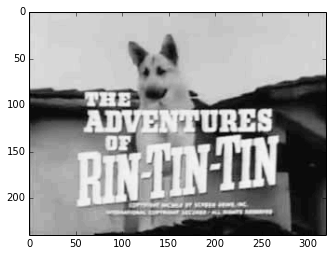

In [156]:
plt.imshow(rintin_gray_new, cmap = "Greys_r")

In [157]:
rintin_gray_new = [np.asarray(line) for line in rintin_gray_new]
rintin_gray_new = np.asarray(rintin_gray_new)
# rintin_gray_new
cv2.imwrite("rintin_new.png", rintin_gray_new)

True

A nova imagem foi feita e salva como "rintin_new.png" no diretório atual.

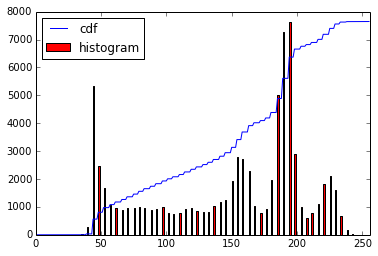

In [158]:
hist,bins = np.histogram(rintin_gray_new.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray_new.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](hall_box_battery1.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e a bateria azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui


In [159]:
hall = cv2.imread("hall_box_battery1.jpg")
hall = cv2.cvtColor(hall, cv2.COLOR_BGR2RGB)

In [160]:
hall.shape

(3006, 5344, 3)

In [161]:
hall_t = hall.transpose()
hall_t

array([[[152, 153, 155, ...,  79,  82,  91],
        [155, 155, 156, ...,  79,  83,  87],
        [154, 154, 154, ...,  89,  89,  85],
        ..., 
        [114, 118, 118, ...,  30,  38,  47],
        [113, 117, 117, ...,  41,  44,  49],
        [113, 122, 122, ...,  47,  46,  46]],

       [[120, 121, 123, ...,  62,  63,  72],
        [123, 123, 124, ...,  64,  66,  68],
        [122, 122, 124, ...,  72,  70,  66],
        ..., 
        [116, 120, 120, ...,  20,  29,  38],
        [115, 119, 119, ...,  32,  32,  37],
        [115, 124, 124, ...,  38,  34,  34]],

       [[ 81,  82,  85, ...,  55,  57,  66],
        [ 84,  84,  86, ...,  57,  59,  62],
        [ 84,  84,  86, ...,  65,  66,  62],
        ..., 
        [113, 117, 117, ...,   8,  14,  23],
        [112, 116, 116, ...,  17,  18,  23],
        [112, 121, 121, ...,  23,  20,  20]]], dtype=uint8)

In [162]:
s = hall_t.shape
s

(3, 5344, 3006)

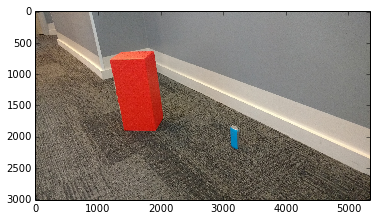

In [163]:
# red_box = hall_t.copy()

    
# for j in range(s[1]):

#     for k in range(s[2]):
#         if hall_t[0][j][k] >= 200 and hall_t[1][j][k] <= 50 and hall_t[2][j][k] <= 50:
#             red_box[0][j][k] = hall_t[0][j][k]
#             red_box[1][j][k] = hall_t[1][j][k]
#             red_box[2][j][k] = hall_t[2][j][k]
      
        
#         else:
#             red_box[0][j][k] = 0
#             red_box[1][j][k] = 0
#             red_box[2][j][k] = 0
            
 
plt.imshow(hall)
            

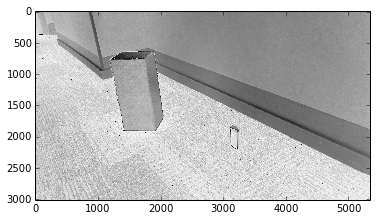

In [164]:
hall_r = hall[:,:,0]
hall_g = hall[:,:,1]
hall_b = hall[:,:,2]

teste = hall_r - hall_g - hall_b


plt.imshow(teste, cmap = "Greys_r")

In [165]:
hall_new = hall.copy()

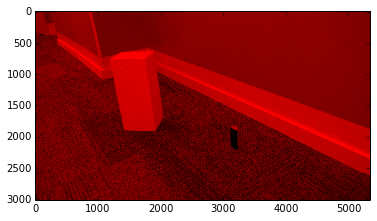

In [166]:
hall_new[:,:,1] = 0
hall_new[:,:,2] = 0

plt.imshow(hall_new)

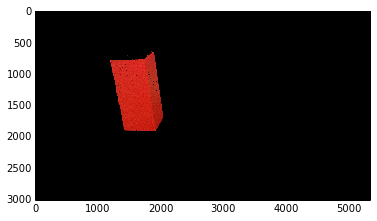

In [182]:
red = ([90, 0, 0], [255, 60, 60])

lower = np.array(red[0], dtype = "uint8")
upper = np.array(red[1], dtype = "uint8")

mask = cv2.inRange(hall, lower, upper)
output = cv2.bitwise_and(hall, hall, mask = mask)

red_image = output
plt.imshow(red_image)

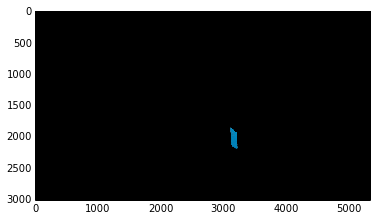

In [183]:
blue = ([0, 100, 100], [50, 150, 200])

lower = np.array(blue[0], dtype = "uint8")
upper = np.array(blue[1], dtype = "uint8")

mask = cv2.inRange(hall, lower, upper)
output = cv2.bitwise_and(hall, hall, mask = mask)

blue_image = output
plt.imshow(blue_image)

Usando máscaras isso fica bem mais fácil...